# PRÉ PROCESSAMENTO



## 1. "Importance of Feature Scaling"

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html



O dimensionamento de recursos por meio da padronização (ou normalização do escore Z) pode ser uma importante etapa de pré-processamento para muitos algoritmos de aprendizado de máquina. A padronização envolve o redimensionamento dos recursos, de modo que eles tenham as propriedades de uma distribuição normal padrão com média de zero e desvio padrão de um.

<br>

Embora **muitos algoritmos (como SVM, KNN e regressão logística) exijam que os recursos sejam normalizados**, intuitivamente, **podemos pensar na Análise de Componentes Principais (PCA) como um excelente exemplo de quando a normalização é importante**. No PCA, estamos interessados nos componentes que maximizam a variação. Se um componente (por exemplo, altura humana) variar menos que outro (por exemplo, peso) por causa de suas respectivas escalas (metros x quilos), o PCA pode determinar que a direção da variação máxima corresponde mais estreitamente ao eixo 'peso', se esses recursos não são dimensionados. Como uma alteração na altura de um metro pode ser considerada muito mais importante do que a alteração no peso de um quilograma, isso está claramente incorreto.

<br>


Para ilustrar isso, o PCA é realizado comparando o uso de dados com o StandardScaler aplicado, com dados não dimensionados. Os resultados são visualizados e uma diferença clara é observada. O 1º componente principal no conjunto não dimensionado pode ser visto. Pode-se ver que o recurso 13 domina a direção, sendo duas ordens de magnitude acima dos demais. Isso é contrastado ao observar o componente principal da versão em escala dos dados. Na versão em escala, as ordens de magnitude são praticamente as mesmas em todos os recursos.

<br>

O conjunto de dados usado é o conjunto de dados do vinho disponível na UCI. Esse conjunto de dados possui recursos contínuos que são heterogêneos em escala devido às diferentes propriedades que eles medem (ou seja, teor de álcool e ácido málico).

<br>

Os dados transformados são então usados ​​para treinar um classificador Bayes ingênuo e é observada uma clara diferença nas precisões de previsão em que o conjunto de dados escalado antes do PCA supera amplamente a versão não escalada.




Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


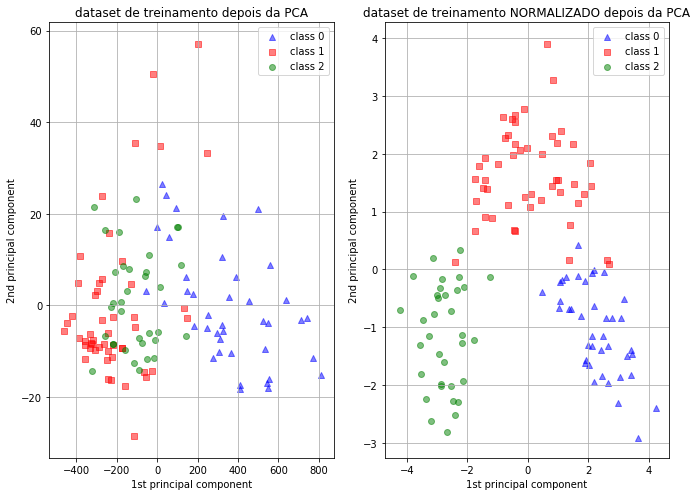

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
#print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Faz train/test split usando 30% como tamanho de teste
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data e prevê usando pipelined GNB e PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit data e prevê usando "pipeline scaling", GNB e PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Mostra as acurácias de previsão em dados padronizados e  em não-padronizados.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extrai PCA do pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Mostra os primeiros principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Usa PCA com e sem escalamento (padronização) em X_train para visualização.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

#  visualiza normalizado vs. não-normalizado com PCA aplicada 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('dataset de treinamento depois da PCA')
ax2.set_title('dataset de treinamento NORMALIZADO depois da PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## Preprocessing data - scikit-learn

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
    
**Em geral, os algoritmos de aprendizado se beneficiam da padronização do conjunto de dados.** Se alguns **outliers** estiverem presentes no conjunto, escaladores ou transformadores robustos são mais apropriados. Os comportamentos dos diferentes dimensionadores, transformadores e normalizadores em um conjunto de dados que contém valores extremos marginais são destacados em Compare the effect of different scalers on data with outliers. (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)


### 6.3.1. Standardization, or mean removal and variance scaling

A **padronização** de conjuntos de dados é um **requisito comum** para muitos estimadores de aprendizado de máquina implementados no scikit-learn; eles podem se comportar mal se os recursos individuais não parecerem mais ou menos com dados padrão normalmente distribuídos: gaussiana com **média zero e variação unitária**.


Na prática, geralmente ignoramos a forma da distribuição e apenas transformamos os dados para centralizá-los, removendo o valor médio de cada recurso e, em seguida, escalonando-o dividindo os recursos não constantes pelo seu desvio padrão.

Famoso Z-Score:

$Z = \frac{X - μ}{\sigma}$


Por exemplo, muitos elementos usados na função objetiva de um algoritmo de aprendizado (como o kernel RBF das Support Vector Machines ou os regularizadores l1 e l2 dos modelos lineares) assumem que todos os recursos estão centralizados em torno de zero e têm variação na mesma ordem. Se um recurso tiver uma variação maior que a dos outros, ele poderá dominar a função objetivo e tornar o estimador incapaz de aprender com outros recursos corretamente, conforme o esperado.


```python
>>>
>>> from sklearn import preprocessing
>>> import numpy as np
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
>>> X_scaled = preprocessing.scale(X_train)

>>> X_scaled
array([[ 0.  ..., -1.22...,  1.33...],
       [ 1.22...,  0.  ..., -0.26...],
       [-1.22...,  1.22..., -1.06...]])
```

Dados escalados com média zero e variância unitária:
```python
>>> X_scaled.mean(axis=0)
array([0., 0., 0.])

>>> X_scaled.std(axis=0)
array([1., 1., 1.])
```

O módulo de pré-processamento fornece ainda uma classe de utilitário **StandardScaler** que implementa a API do Transformer para calcular a média e o desvio padrão em um conjunto de treinamento para poder reaplicar posteriormente a mesma transformação no conjunto de teste. Portanto, esta classe é adequada para uso nas etapas iniciais de um **sklearn.pipeline.Pipeline**:

```python
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> scaler
StandardScaler()

>>> scaler.mean_
array([1. ..., 0. ..., 0.33...])

>>> scaler.scale_
array([0.81..., 0.81..., 1.24...])

>>> scaler.transform(X_train)
array([[ 0.  ..., -1.22...,  1.33...],
       [ 1.22...,  0.  ..., -0.26...],
       [-1.22...,  1.22..., -1.06...]])
```

A instância do scaler pode então ser usada em novos dados para transformá-los da mesma maneira que no conjunto de treinamento:
```python
>>> scaler.transform(X_test)
array([[-2.44...,  1.22..., -0.26...]])
```

É possível desativar a centralização ou a escala passando with_mean = False ou with_std = False para o construtor do StandardScaler.

### 6.3.1.1. Scaling features to a range


Uma padronização alternativa é dimensionar recursos para ficar entre um valor mínimo e máximo especificado, geralmente entre zero e um, ou para que o valor absoluto máximo de cada recurso seja dimensionado para o tamanho da unidade. Isso pode ser alcançado usando MinMaxScaler ou MaxAbsScaler, respectivamente.

A motivação para usar esse dimensionamento inclui robustez a desvios padrão muito pequenos de recursos e preservação de zero entradas em dados esparsos.

Aqui está um exemplo para dimensionar uma matriz de dados de brinquedo no intervalo [0, 1]:

```python
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
...
>>> min_max_scaler = preprocessing.MinMaxScaler()
>>> X_train_minmax = min_max_scaler.fit_transform(X_train)
>>> X_train_minmax
array([[0.5    , 0.     , 1.        ],
       [1.     , 0.5    , 0.33333333],
       [0.     , 1.     , 0.        ]])
```

A mesma instância do transformador pode ser aplicada a alguns novos dados de teste não vistos durante a chamada de ajuste (fit): as mesmas operações de escala e deslocamento serão aplicadas para serem consistentes com a transformação executada nos dados de treinamento:
```python
>>> X_test = np.array([[-3., -1.,  4.]])
>>> X_test_minmax = min_max_scaler.transform(X_test)
>>> X_test_minmax
array([[-1.5       ,  0.        ,  1.66666667]])
```


É possível examinar os atributos do scaler para descobrir a natureza exata da transformação aprendida nos dados de treinamento:

```python
>>> min_max_scaler.scale_
array([0.5       , 0.5       , 0.33...])

>>> min_max_scaler.min_
array([0.        , 0.5       , 0.33...])
```


Se o MinMaxScaler receber um feature_range= (min, max) explícito, a fórmula completa será:

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min
```

O MaxAbsScaler funciona de maneira muito semelhante, mas é dimensionado de maneira que os dados de treinamento estejam dentro do intervalo [-1, 1] dividindo o maior valor máximo em cada recurso. É destinado a dados que já estão centralizados em zero ou em dados esparsos.

Aqui está como usar os dados de brinquedo do exemplo anterior com este escalador:

```python
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
...
>>> max_abs_scaler = preprocessing.MaxAbsScaler()
>>> X_train_maxabs = max_abs_scaler.fit_transform(X_train)
>>> X_train_maxabs
array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])
>>> X_test = np.array([[ -3., -1.,  4.]])
>>> X_test_maxabs = max_abs_scaler.transform(X_test)
>>> X_test_maxabs
array([[-1.5, -1. ,  2. ]])
>>> max_abs_scaler.scale_
array([2.,  1.,  2.])
```

### 6.3.1.2. Scaling sparse data

A centralização de dados esparsos destruiria a estrutura de escassez (sparseness) dos dados e, portanto, raramente é uma coisa sensata a ser feita. No entanto, pode fazer sentido escalar inputs esparsos, especialmente se os recursos estiverem em escalas diferentes.

MaxAbsScaler e maxabs_scale foram projetados especificamente para dimensionar dados esparsos e são a maneira recomendada de fazer isso. No entanto, scale e StandardScaler podem aceitar matrizes scipy.sparse como entrada, desde que with_mean = False seja explicitamente passado ao construtor. Caso contrário, um ValueError será gerado, pois a centralização silenciosa quebraria a escassez e freqüentemente travaria a execução alocando quantidades excessivas de memória sem intenção. O RobustScaler não pode ser ajustado para entradas esparsas, mas você pode usar o método de transformação em entradas esparsas.

Observe que os dimensionadores aceitam o formato Linhas dispersas compactadas e Colunas dispersas compactadas (consulte scipy.sparse.csr_matrix e scipy.sparse.csc_matrix). Qualquer outra entrada esparsa será convertida na representação de Linhas esparsas compactadas. Para evitar cópias desnecessárias da memória, é recomendável escolher a representação CSR ou CSC upstream.

Por fim, se se espera que os dados centralizados sejam pequenos o suficiente, converter explicitamente a entrada em uma matriz usando o método de matriz de matrizes esparsas é outra opção.


### 6.3.1.3. Scaling data with outliers

Se seus dados contiverem muitos **outliers**, o dimensionamento usando a média e a variação dos dados provavelmente **não funcionará muito bem**. **Nesses casos, você pode usar o robust_scale e o RobustScaler como substitutos do drop-in.** Eles usam estimativas mais robustas para o centro e o alcance dos seus dados.

### Scaling vs Whitening

Às vezes, não é suficiente centralizar e dimensionar os recursos de forma independente, uma vez que um modelo a jusante pode assumir ainda mais a independência linear dos recursos.

Para solucionar esse problema, você pode usar sklearn.decomposition.PCA com whiten = True para remover ainda mais a correlação linear entre os recursos.


### 6.3.1.4. Centering kernel matrice

Se você tiver uma matriz de kernel de um kernel $K$ que calcula um produto de ponto em um espaço de recurso definido por função $\phi$, um KernelCenterer pode transformar a matriz do kernel para que ele contenha produtos internos no espaço de recurso definido por $\phi$ seguido da remoção da média nesse espaço. 




## Map data to a normal distribution¶


This example demonstrates the use of the Box-Cox and Yeo-Johnson transforms through **PowerTransformer** to map data from various distributions to a normal distribution.

The power transform is useful as a transformation in modeling problems where homoscedasticity and normality are desired. Below are examples of Box-Cox and Yeo-Johnwon applied to six different probability distributions: Lognormal, Chi-squared, Weibull, Gaussian, Uniform, and Bimodal.

Note that the transformations successfully map the data to a normal distribution when applied to certain datasets, but are ineffective with others. This highlights the importance of visualizing the data before and after transformation.

Also note that even though Box-Cox seems to perform better than Yeo-Johnson for lognormal and chi-squared distributions, keep in mind that Box-Cox does not support inputs with negative values.

For comparison, we also add the output from **QuantileTransformer**. It can force any arbitrary distribution into a gaussian, provided that there are enough training samples (thousands). Because it is a non-parametric method, it is harder to interpret than the parametric ones (Box-Cox and Yeo-Johnson).

On “small” datasets (less than a few hundred points), the quantile transformer is prone to overfitting. The use of the power transform is then recommended.

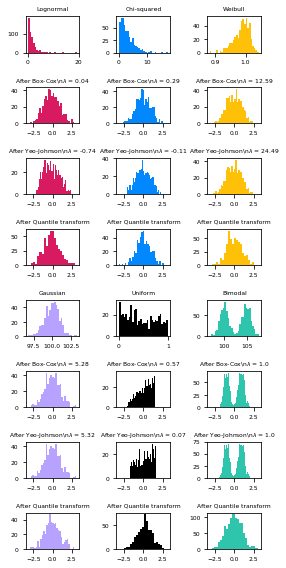

In [2]:
# Author: Eric Chang <ericchang2017@u.northwestern.edu>
#         Nicolas Hug <contact@nicolas-hug.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

#print(__doc__)


N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60', '#0188FF', '#FFC107',
          '#B7A2FF', '#000000', '#2EC5AC']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

## Modelos

# SVM 


https://scikit-learn.org/stable/modules/svm.html


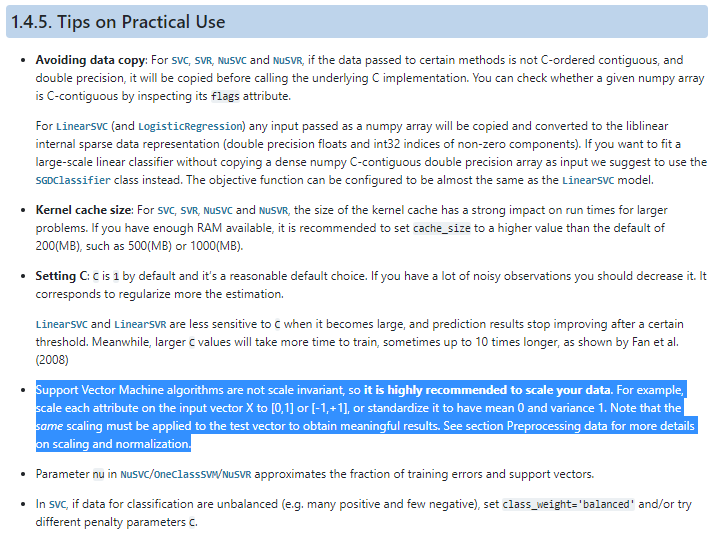


" **Máquinas de Vetores de Suporte não são invariantes à escala, então é altamente recomendado escalar os dados.** Por exemplo, escalar cada atributo no vetor de input X de [0,1] para [-1,+1], ou padronizar para ter média 0 e variância 1. Note que a mesma "dimensionalização" (scaling) deve ser aplicada para o vetor de teste para obter resultados significativos. 
Verifique a seção "Preprocessing data" para mais detalhes... 

## Why does scaling the features affect the prediction of a regression?


https://stats.stackexchange.com/questions/260872/why-does-scaling-the-features-affect-the-prediction-of-a-regression

4


1
I'm working on a regression problem using the support vector regression model from sklearn and using MinMax to scale the features, but by using it I get a different result for the regression, does that makes sense?
```python
import pandas as pd
import numpy as np
from sklearn import  svm
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
X_training = np.random.rand(100,15)*10
Y_training = np.random.rand(100,1)*10
model = svm.SVR()
```
without scaling:
```python

model.fit(X_training,Y_training)
print model.predict(X_training)[0:10]

array([ 4.99980599,  6.99479293,  4.9784396 ,  5.03911175,  6.99557904,
        6.57214885,  6.99454049,  5.60940831,  6.99989978,  5.98628179])
Using MinMax scaler:

scaler = MinMaxScaler()
X_scaled  = scaler.fit_transform(X_training)
model.fit(X_scaled,Y_training)
model.predict(X_scaled)[0:10]

array([ 5.63521939,  6.70378514,  5.83393228,  5.33274858,  6.47539108,
        5.61135278,  5.7890052 ,  5.74425789,  6.15799404,  6.1980326 ])
```
Although the prediction is in the same order of magnitude there is a significant difference between both cases.

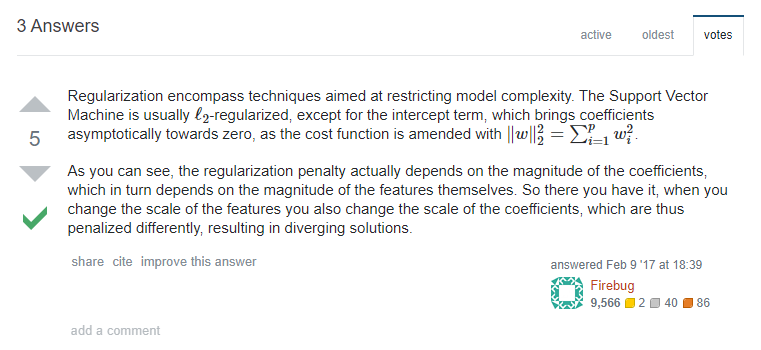

In [3]:
import pandas as pd
import numpy as np
from sklearn import  svm
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
X_training = np.random.rand(100,15)*10
Y_training = np.random.rand(100,1)*10
model = svm.SVR()
print(' ', '\n', 'X_training: ', '\n', X_training, 
     '\n', ' ', '\n', 'Y_training: ', '\n', Y_training)

  
 X_training:  
 [[5.48813504 7.15189366 6.02763376 ... 5.68044561 9.25596638 0.71036058]
 [0.871293   0.20218397 8.32619846 ... 9.44668917 5.21848322 4.1466194 ]
 [2.64555612 7.74233689 4.56150332 ... 6.97631196 0.60225472 6.66766715]
 ...
 [6.0754536  5.26584029 5.37945779 ... 1.96450992 6.71527697 8.42973296]
 [0.16252789 6.42803375 4.42873025 ... 0.38044682 9.56544105 6.67168821]
 [9.64200419 5.31494278 8.02068524 ... 1.12249993 0.42364047 2.27740993]] 
   
 Y_training:  
 [[4.4679332 ]
 [8.36990365]
 [2.21824031]
 [4.93945256]
 [9.29618739]
 [6.67214707]
 [7.9807902 ]
 [5.5099397 ]
 [9.80466459]
 [5.88662155]
 [0.45510714]
 [1.979828  ]
 [4.04773629]
 [6.01277173]
 [7.71930867]
 [4.13086126]
 [7.10058305]
 [7.89869503]
 [3.17260197]
 [9.7927024 ]
 [6.49656495]
 [8.80998061]
 [5.55937689]
 [7.41603107]
 [7.70544062]
 [9.08248379]
 [1.50349757]
 [5.58283424]
 [4.28378513]
 [9.23159021]
 [1.05094694]
 [9.82573889]
 [8.75451324]
 [0.73826282]
 [4.90966386]
 [7.175595  ]
 [7.38151546

In [4]:
model.fit(X_training,Y_training)

unscaled = model.predict(X_training)[0:10]
print(' sem SCALING: ', '\n', 
      model.predict(X_training)[0:10])


#Using MinMax scaler:

scaler = MinMaxScaler()
X_scaled  = scaler.fit_transform(X_training)
model.fit(X_scaled,Y_training)
model.predict(X_scaled)[0:10]

scaled = model.predict(X_scaled)[0:10]

print(' ', '\n', 'COM SCALING: ', '\n', 
      'model.predict(X_scaled)[0:10]: ', '\n', model.predict(X_scaled)[0:10])

 sem SCALING:  
 [4.99980599 6.99479293 4.9784396  5.03911175 6.99557904 6.57214885
 6.99454049 5.60940831 6.99989978 5.98628179]
  
 COM SCALING:  
 model.predict(X_scaled)[0:10]:  
 [5.63521939 6.70378514 5.83393228 5.33274858 6.47539108 5.61135278
 5.7890052  5.74425789 6.15799404 6.1980326 ]


C:\Users\Pedro.braga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pedro.braga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pedro.braga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pedro.braga\AppData\Local\Continuum\anaconda3\lib\site-packages\

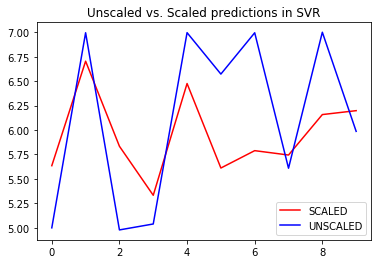

In [5]:
import matplotlib.pyplot as plt
import statistics

x = [i for i in range(len(scaled))]

plt.title('Unscaled vs. Scaled predictions in SVR')
plt.plot(x, scaled, c='red', label='SCALED')
plt.legend(loc='best')
plt.plot(x, unscaled, c='blue', label='UNSCALED')
plt.legend(loc='best')
plt.show()

In [24]:
from scipy.stats import moment
print(40*'_', '\n', 'COM Pré-processamento', '\n', ' ')
print('Media : ', moment(scaled, moment=1), ' | ', 'Variancia: ', moment(scaled, moment=2))

print(40*'_', '\n', 'SEM Pré-processamento', '\n', ' ')
print('Media : ', moment(unscaled, moment=1), ' | ', 'Variancia: ', moment(unscaled, moment=2))

________________________________________ 
 COM Pré-processamento 
  
Media :  0.0  |  Variancia:  0.1625465024851849
________________________________________ 
 SEM Pré-processamento 
  
Media :  0.0  |  Variancia:  0.728019324596246


Fica visível que o **escalamento** dos dados antes da aplicação do SVR **reduz a variância** das previsões, assim como no texto, em "A regularização abrange técnicas destinadas a restringir a complexidade do modelo.".


## "Como você pode ver, a penalidade de regularização realmente depende da magnitude dos coeficientes, que por sua vez depende da magnitude dos recursos em si. Portanto, quando você altera a escala dos recursos, também altera a escala dos coeficientes, que são penalizados de maneira diferente, resultando em soluções divergentes."



Outra referência interessante: 

https://www.researchgate.net/post/What_is_the_correct_procedure_on_scaling_and_then_evaluating_in_a_regression_problem

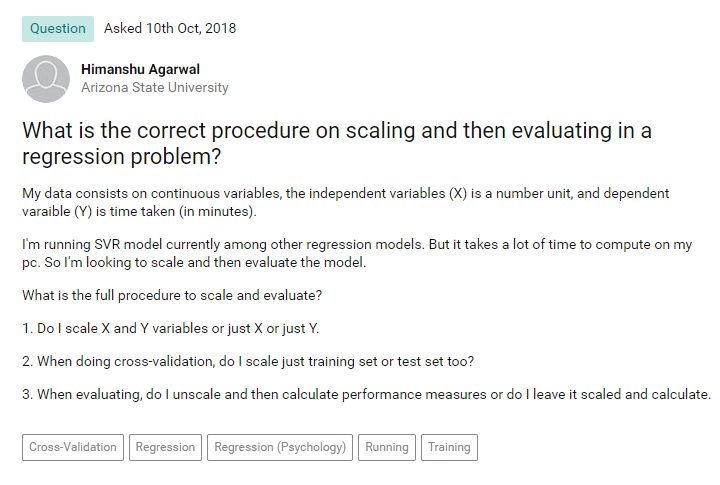


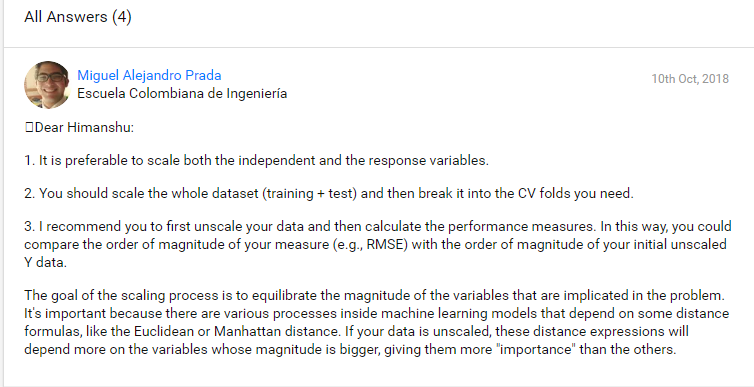

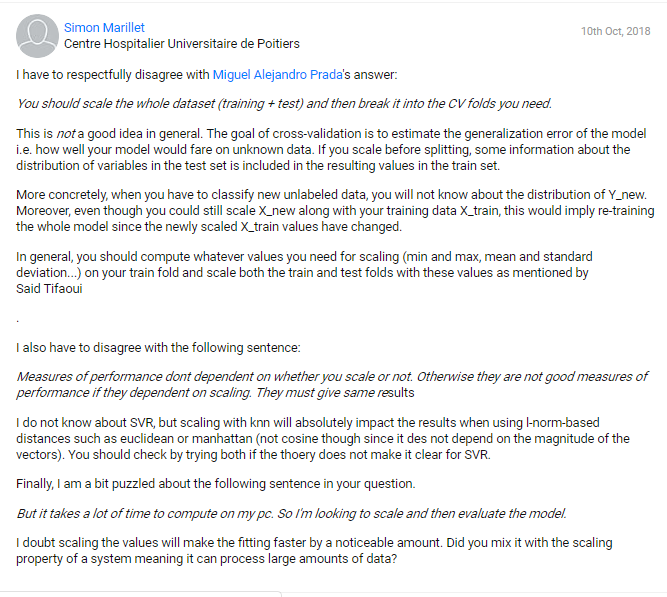

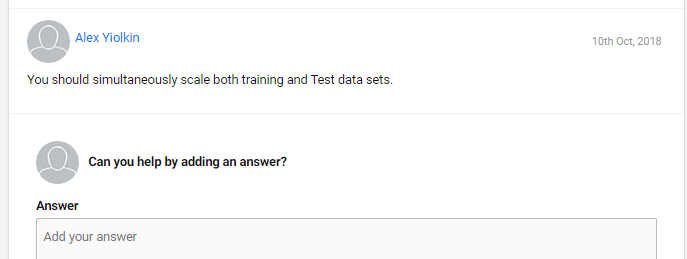

# KNN

Referências interessantes:
https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn
https://discuss.analyticsvidhya.com/t/why-it-is-necessary-to-normalize-in-knn/2715

### Why do you need to scale data in KNN?

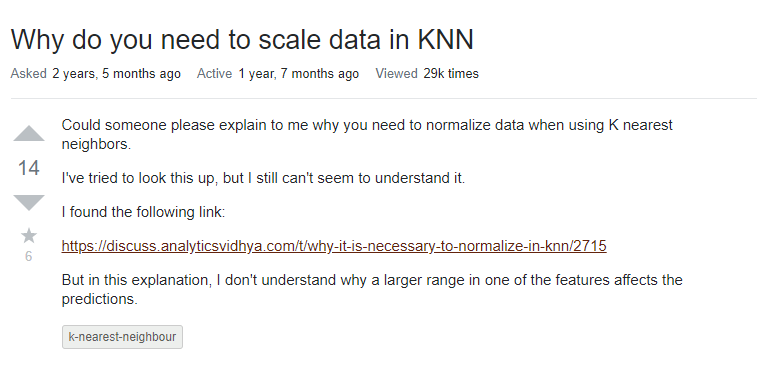

resposta:

"I think normalization has to be justified from the subject-matter point of view. Essentially, what matters is what defines the distance between points. You have to find a convenient arithmetic definition of distance that reflects the subject-matter definition of distance. In my limited experience, I have normalize in some but not all directions based on subject-matter considerations. – Richard Hardy Jun 26 '17 at 19:00"



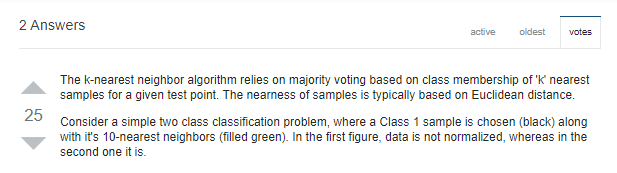

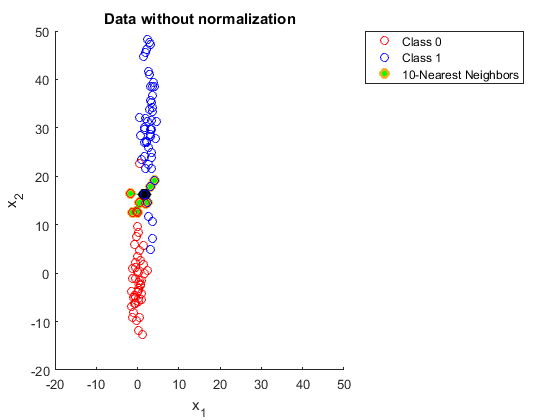

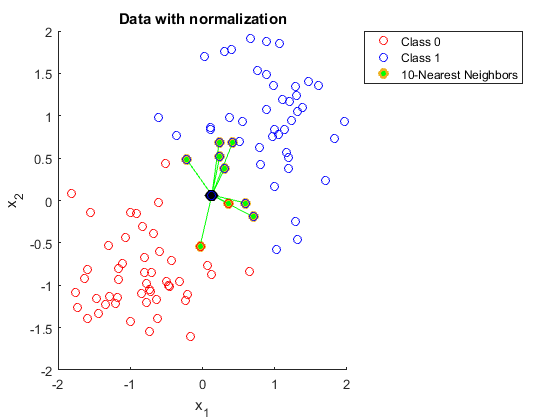

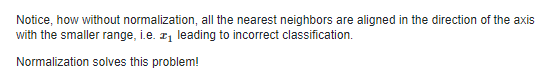

The mechanics of preprocessing: scaling and centering
 
Before running a model, such as regression (predicting a continuous variable) or classification (predicting a discrete variable), on data, you almost always want to do some preprocessing. For numerical variables, it is common to either normalize or standardize your data. What do these terms mean?

All normalization means is scaling a dataset so that its minimum is 0 and its maximum 1. To achieve this we transform each data point x to

$x_{normalized}=\frac{x−x_{min}}{x_{max}−x_{min}}$

Stardardization is slightly different; it's job is to center the data around 0 and to scale with respect to the standard deviation:

$x_{standardized}=\frac{x−μ}{σ}$,

where μ and σ are the mean and standard deviation of the dataset, respectively. First note that these transformations merely change the range of the data and not the distribution. You may later wish to use any other number of transforms, such as a log transform or a Box-Cox transform, to make your data look more Gaussian (like a bell-curve). But before we go further, it is important to ask the following questions: why do we scale our data? Are there times that it is more appropriate than others? For example, is it more important in classification problems than in regression?

<br>


## Antes

```python
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
We now build the k-NN model, make predictions on the test set and compare these predictions to the ground truth in order to get a measure of model performance:

from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))
 
k-NN accuracy for test set: 0.612500
```
### Acurácia: 61.25%

<br>

## Depois -> Com Pré-processamento   

```python
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))
 
k-NN score for test set: 0.712500
k-NN score for training set: 0.814699
             precision    recall  f1-score   support

      False       0.72      0.79      0.75       179
       True       0.70      0.62      0.65       141

avg / total       0.71      0.71      0.71       320
```
### Acurácia:71%



"
Todas essas medidas melhoraram 0,1, o que representa uma melhoria de 16% e é significativa! Como sugerido acima, antes da escala, havia várias variáveis preditivas com intervalos de diferentes ordens de magnitudes, o que significa que uma ou duas delas poderiam dominar no contexto de um algoritmo como o k-NN. Os dois principais motivos para dimensionar seus dados são:

1. Suas variáveis preditoras podem ter intervalos significativamente diferentes e, em certas situações, como na implementação do k-NN, isso precisa ser mitigado para que certos recursos não dominem o algoritmo;



2. Você deseja que seus recursos sejam independentes da unidade, ou seja, não dependam da escala da medição envolvida: por exemplo, você pode ter um recurso medido expresso em metros e eu posso ter o mesmo recurso expresso em centímetros. Se ambos escalarmos nossos respectivos dados, esse recurso será o mesmo para cada um de nós.
"


<br>
<br>

Sobre o paper :


**"Dynamic Feature Scaling for K-Nearest Neighbor Algorithm**
Chandrasekaran Anirudh Bhardwaj1
, Megha Mishra 1
, Kalyani Desikan2
1B-Tech, School of computing science and engineering, VIT University, Chennai, India
1B-Tech, School of computing science and engineering, VIT University, Chennai, India
2Faculty-School of Advanced Sciences, VIT University,Chennai, India
"
https://arxiv.org/ftp/arxiv/papers/1811/1811.05062.pdf

<br>

(Cuja leitura recomendo bastante!)

<br>

"
O algoritmo de vizinhos mais próximos é um algoritmo de aprendizado lento, no qual o algoritmo tenta
aproximar as previsões com a ajuda de vetores existentes semelhantes no conjunto de dados de treinamento.
As previsões feitas pelo algoritmo K-Nearest Neighbors são baseadas na média dos valores-alvo
dos vizinhos espaciais. O processo de seleção de vizinhos no espaço Hermitiano é realizado com
a ajuda de métricas de distância como distância euclidiana, distância de Minkowski, Mahalanobis
etc. 


A maioria das métricas, como a distância euclidiana, é uma variação de escala, o que significa que
os resultados podem variar para diferentes valores usados para os recursos. 


Técnicas padrão
usado para a normalização de fatores de escala são os métodos de escala de recursos, como o Z-score
técnica de normalização, escala Min-Max, etc. 


Os métodos de escala atribuem uniformemente pesos iguais
a todos os recursos, o que pode resultar em uma situação não ideal. 


Este artigo propõe um novo método para atribuir pesos a recursos individuais, com a ajuda de erros fora da bolsa, obtidos de
construindo vários modelos de árvore de decisão.
"

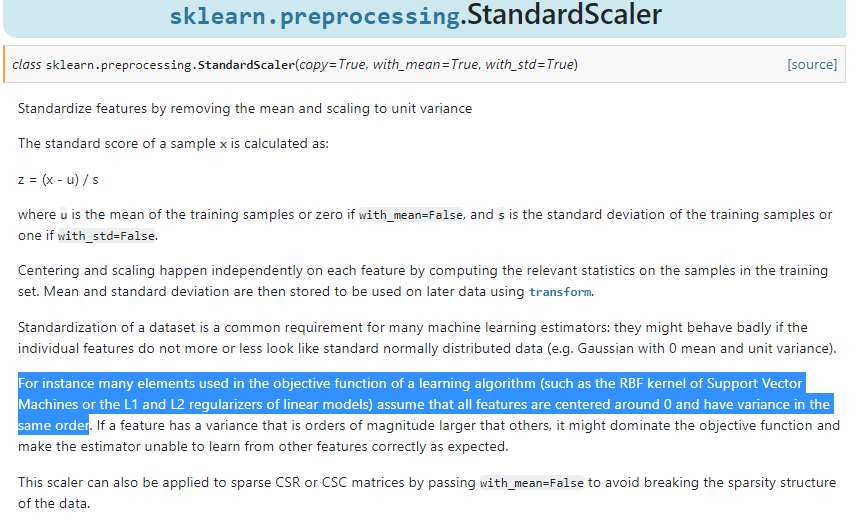

# MLP


In [30]:
# Author: Issam H. Laradji
# License: BSD 3 clause
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

import statistics as stat

def teste_escalamento_mlpclassifier(escala):


    h = .02  # step size in the mesh

    alphas = np.logspace(-5, 3, 5)
    names = ['alpha ' + str(i) for i in alphas]

    classifiers = []
    for i in alphas:
        classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                         hidden_layer_sizes=[100, 100]))

    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                               random_state=0, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
                make_circles(noise=0.2, factor=0.5, random_state=1),
                linearly_separable]

    figure = plt.figure(figsize=(17, 9))
    i = 1
    # iterate over datasets
    for X, y in datasets:
        # preprocess dataset, split into training and test part
        if escala==True:
            X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        scores = []
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            scores.append(score)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='black', s=25)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6, edgecolors='black', s=25)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()
    print(scores)
    print('Média de scores: ', stat.mean(scores))

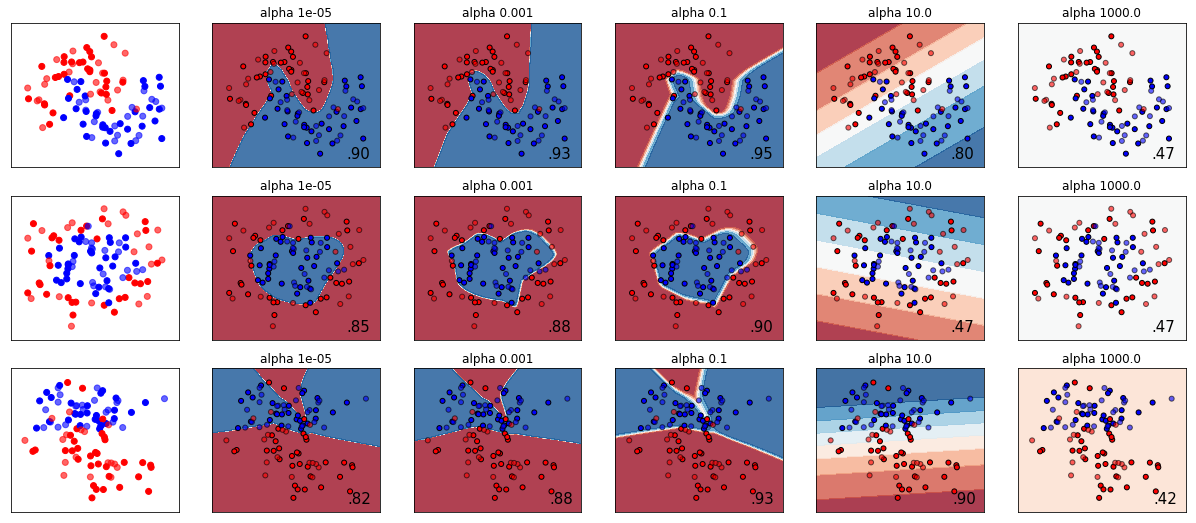

[0.825, 0.875, 0.925, 0.9, 0.425]
Média de scores:  0.79


In [31]:
teste_escalamento_mlpclassifier(escala=True)

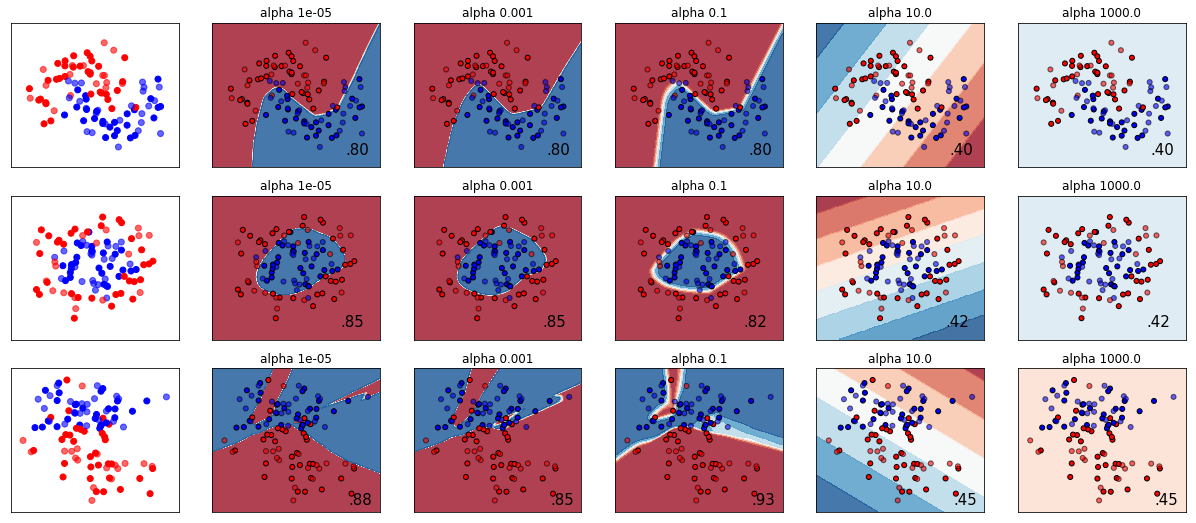

[0.875, 0.85, 0.925, 0.45, 0.45]
Média de scores:  0.71


In [32]:
teste_escalamento_mlpclassifier(escala=False)

## Fica claro então que neste exemplo com o classificador MLP o pré-processamento gera resultados com maior média de acertos.

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

<br>

The advantages of Multi-layer Perceptron are:

- Capability to learn non-linear models.


- Capability to learn models in real-time (on-line learning) using partial_fit.

<br>


The disadvantages of Multi-layer Perceptron (MLP) include:

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
<br>


- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
<br>


- **MLP is sensitive to feature scaling.**
<br>


## 1.17.8. Tips on Practical Use¶

<br>

- Multi-layer Perceptron is sensitive to feature scaling, so 

## it is highly recommended to scale your data. 

For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.
<br>

```python
>>>
>>> from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
>>> scaler = StandardScaler()  # doctest: +SKIP
>>> # Don't cheat - fit only on training data
>>> scaler.fit(X_train)  # doctest: +SKIP
>>> X_train = scaler.transform(X_train)  # doctest: +SKIP
>>> # apply same transformation to test data
>>> X_test = scaler.transform(X_test)  # doctest: +SKIP
```
<br>
An alternative and recommended approach is to use StandardScaler in a Pipeline

- Finding a reasonable regularization parameter  is best done using GridSearchCV, usually in the range 10.0 ** -np.arange(1, 7).


- Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.

# Ridge Regression

https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression

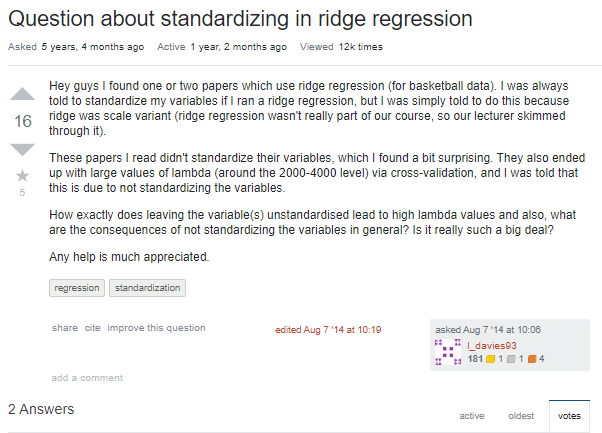

Resposta:

A regressão de Ridge regulariza a regressão linear impondo uma penalidade no tamanho dos coeficientes. Assim, os coeficientes são reduzidos para zero e um para o outro. Mas quando isso acontece e **se as variáveis independentes não tiverem a mesma escala, o encolhimento não é justo.** **Duas variáveis independentes com escalas diferentes terão contribuições diferentes para os termos penalizados, porque o termo penalizado é uma soma dos quadrados de todos os coeficientes. Para evitar esse tipo de problema, muitas vezes as variáveis independentes são centralizadas e escalonadas para obter variação 1.**

<br>

Suponha agora que você tenha uma altura variável independente. Agora, a altura humana pode ser medida em polegadas, metros ou quilômetros. Se medido em quilômetros, em comparação com a regressão linear padrão, acho que dará um termo de coeficiente muito maior do que se medido em milímetros.

<br>

O termo de penalização com lambda é o mesmo que expressar a função de perda quadrada em relação à soma dos coeficientes quadrados menores ou iguais a uma determinada constante. Isso significa que lambda maior dá muito espaço à soma quadrada de coeficientes e lambda menor, um espaço menor. Espaço maior ou menor significa valores absolutos maiores ou menores dos coeficientes.

<br>

**Ao não usar a padronização, a adaptação ao modelo pode exigir grandes valores absolutos dos coeficientes.** Obviamente, podemos ter um grande valor de coeficiente naturalmente, devido ao papel da variável no modelo.**O que afirmo é que esse valor pode ter um valor inflado artificialmente devido à falta de escala. Portanto, o dimensionamento também diminui a necessidade de grandes valores de coeficientes.** Assim, o valor ótimo de lambda seria geralmente menor, o que corresponde a uma menor soma dos valores quadrados dos coeficientes.

<br>
<br>

## em outro exemplo...

https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db


## "Now the dataset is loaded, subsequently, the features should be standardized. Since ridge regression shrinks coefficients by penalizing, the features should be scaled for start condition to be fair. This post explains some more details about this issue."


## COM Padronização

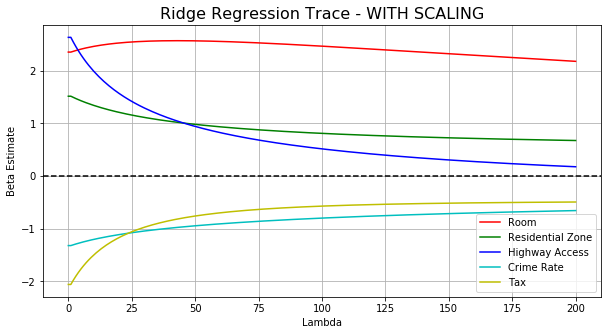

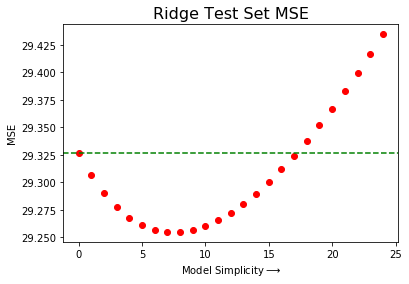

In [12]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

'''
Now the dataset is loaded, subsequently, the features should be standardized. 
Since ridge regression shrinks coefficients by penalizing, 
the features should be scaled for start condition to be fair. 
This post explains some more details about this issue.

'''


# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

#pd.DataFrame({'variable': house_price.feature_names, 'estimate': ols_reg.coef_})

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)


'''
Next, we can iterate the lambda values ranged from 0 to 199. 
Note that the coefficients at lambda equal to zero (x = 0) 
are the same with the OLS coefficients.

'''

# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()

'''
Now, we can draw plot from the data frame. 
Only five attributes are selected for better visualization.
'''


# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace - WITH SCALING", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)
plt.show()

'''
‘Room’ should be the best indicator for house price by intuition. 
This is why the line in red does not quite shrink over iteration. 
On the contrary, ‘Highway Access’ (blue) decreases remarkably,
which means the feature loses its importance as we seek more general models.
'''

'''
The similar patterns are seen from the rest converging to zero,
the black dotted line.
If we increase the lambda more and more (extremely biased), 
then only ‘Room’ would stay significant, 
which makes sense again because the number of rooms must explain the most.
'''

# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[:25], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")
plt.show()

## SEM Padronização


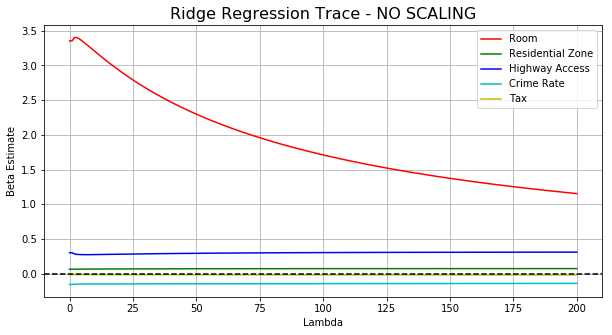

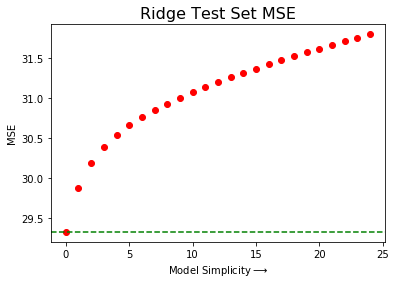

In [13]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error



# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target


ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)

#pd.DataFrame({'variable': house_price.feature_names, 'estimate': ols_reg.coef_})



# WITHOUT standardizING and train/test split
#house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)


# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()


# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace - NO SCALING", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)
plt.show()


# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[:25], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")
plt.show()

# Gradient Boosting Regression

<br>

Referência bacana:
https://stackoverflow.com/questions/52114099/is-normalization-or-scaling-useful-for-regression-with-gradient-tree-boosting

<br>

In [14]:
import subprocess
import sys

def install(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    except Exception as e:
        print('Erro na instalação: ', e)

In [15]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

def gbr(escala):
    boston = load_boston()
    y = boston['target']
    X = boston['data']

    mse = []

    if escala==True:
        print(20*'_', '\n', ' ', '\n', 'Com scale: ', '\n', ' ')
        for scale in np.logspace(-6, 6, 7):
            gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=0, loss='huber', verbose=True) 
            xgb_model = gbr.fit(X, y / scale)
            y_predicted = xgb_model.predict(X) * scale
            print('{} (scale={})'.format(mean_squared_error(y, y_predicted), scale))
            mse.append(mean_squared_error(y, y_predicted))
    else:
        print(20*'_', '\n', ' ', '\n', 'SEM scale: ', '\n', ' ')
        for scale in np.logspace(-6, 6, 7):
            gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=0, loss='huber', verbose=True) 
            xgb_model = gbr.fit(X, y / scale)
            y_predicted = xgb_model.predict(X) #* scale
            print('{} (scale={})'.format(mean_squared_error(y, y_predicted), scale))
            mse.append(mean_squared_error(y, y_predicted))
            
    return mse

In [16]:
mse1 = gbr(escala=True)
mse2 = gbr(escala=False)

____________________ 
   
 Com scale:  
  
      Iter       Train Loss   Remaining Time 
         1 32465851893841.1484            2.58s
         2 26843446177752.5859            2.07s
         3 22312406799397.7500            1.96s
         4 18632545050292.5781            1.71s
         5 15623501369104.6484            1.59s
         6 13138850675948.8418            1.48s
         7 11088911615706.2402            1.40s
         8 9399225994628.8730            1.34s
         9 8020518784752.1758            1.29s
        10 6873916909886.8418            1.27s
        20 1937198268011.1785            1.19s
        30 935493634311.6683            1.05s
        40 588435654255.5796            0.98s
        50 427316865139.2317            0.91s
        60 329992614862.4523            0.83s
        70 270037170810.6281            0.74s
        80 221850304030.9832            0.66s
        90 186713496683.9211            0.60s
       100 151158097159.1242            0.55s
       200 26310158

        30    91222823.0227            1.30s
        40    58873598.0494            1.27s
        50    42209685.4494            1.18s
        60    33423589.6151            1.04s
        70    28567414.0019            0.93s
        80    24496967.0298            0.83s
        90    19779310.4371            0.74s
       100    15759585.1986            0.65s
       200     3056231.1641            0.00s
59087377782.12821 (scale=0.0001)
      Iter       Train Loss   Remaining Time 
         1      324658.5189            1.59s
         2      268434.4630            1.68s
         3      223124.0648            1.57s
         4      186325.4575            1.42s
         5      156235.0154            1.48s
         6      131388.5022            1.39s
         7      110889.1160            1.32s
         8       93992.2592            1.27s
         9       80205.1876            1.23s
        10       68739.1673            1.19s
        20       19373.6475            1.07s
        30        925

In [17]:
mse1

[0.10481706771602567,
 0.10533065389873851,
 0.09085115564945699,
 0.09085115709859448,
 0.09934526781887817,
 17.315715942198963,
 84.98759790628347]

In [18]:
mse2

[591216712607022.6,
 59087377782.12821,
 5796909.158920772,
 0.09085115709859448,
 580.3744801851643,
 592.0364365541816,
 592.1459355070964]

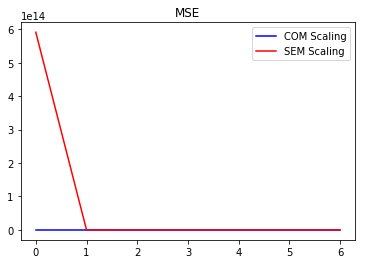

In [19]:
x = [i for i in range(len(mse1))]

plt.title('MSE')
plt.plot(x, mse1, color='blue', label='COM Scaling')
plt.legend(loc='best')
plt.plot(x, mse2, color='red', label='SEM Scaling')
plt.legend(loc='best')
plt.show()

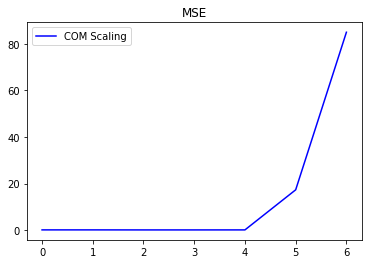

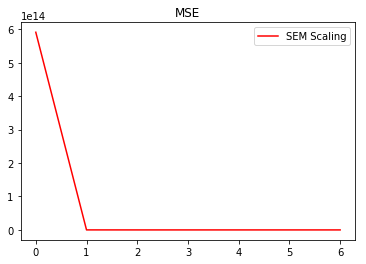

In [20]:

plt.title('MSE')
plt.plot(x, mse1, color='blue', label='COM Scaling')
plt.legend(loc='best')
plt.show()

plt.title('MSE')
plt.plot(x, mse2, color='red', label='SEM Scaling')
plt.legend(loc='best')
plt.show()

In [27]:
import statistics as stats

print('Média dos MSE - Sem escalamento: ', stats.mean(mse2),
     '\n', ' ', '\n',
     'Média dos MSE - Com escalamento: ', stats.mean(mse1))

Média dos MSE - Sem escalamento:  84467972254782.66 
   
 Média dos MSE - Com escalamento:  14.684929878666305


In [28]:
from scipy.stats import moment
print(40*'_', '\n', 'SEM Pré-processamento', '\n', ' ')
print('Media : ', moment(mse2, moment=1), ' | ', 'Variancia: ', moment(mse2, moment=2))

print(40*'_', '\n', 'COM Pré-processamento', '\n', ' ')
print('Media : ', moment(mse1, moment=1), ' | ', 'Variancia: ', moment(mse1, moment=2))

________________________________________ 
 SEM Pré-processamento 
  
Media :  0.0  |  Variancia:  4.279904805704713e+28
________________________________________ 
 COM Pré-processamento 
  
Media :  0.0  |  Variancia:  859.034873741917


# Random Forest e GBR

<br>

Referência:http://uc-r.github.io/gbm_regression

<br>

"Nota importante: os **métodos baseados em árvore tendem a ter um bom desempenho em dados não processados** (ou seja, sem recursos de normalização, centralização e dimensionamento). Neste tutorial, eu me concentro em como implementar GBMs com vários pacotes. Embora eu não tenha pré-processado os dados, perceba que você pode melhorar o desempenho do modelo gastando tempo processando atributos variáveis."

<br>


